# B站排行榜RANK100数据预处理及探索性数据分析
***
项目地址

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use({'figure.figsize':(15,10)})

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

## 数据读取

In [2]:
df = pd.read_csv('data/bilibili_rank100_data.csv')

In [3]:
df.head()

,author,title,tag,funs,like,coins,collect,share,danmu,reply,partition,time,like_rate,coins_rate,collect_rate,share_rate,views
0,木鱼水心,许三多孤身入敌！老A全军覆没？《士兵突击》P8,影视 影视杂谈,7965289,247781,143746,24366,2807,28080,7246,all,67.316667,0.153092,0.088814,0.015055,0.001734,1618512
1,歪果仁研究协会,我在第一次见面的地方向她求婚了,生活 日常,4049110,207752,228697,28627,5070,16583,8594,all,45.666667,0.174802,0.192425,0.024087,0.004266,1188497
2,是老胡没错,社 交 废 物 4,生活 搞笑,813083,203563,62321,32952,17195,7308,6795,all,72.416667,0.088406,0.027065,0.014311,0.007468,2302605
3,鲁大能,“你 开 炮 啊 ！”【迫击炮快乐阴人流#2】,游戏 网络游戏,1964943,167715,122199,29608,5901,9272,1883,all,54.016667,0.140297,0.102222,0.024768,0.004936,1195430
4,进击的金厂长,当 代 毕 业 生 生 存 现 状 3.0,动画 综合,2689136,128799,116933,38051,6813,4448,3357,all,70.316667,0.080464,0.073051,0.023771,0.004256,1600703


## 数据预处理

In [4]:
# 按标题去重
df = df.drop_duplicates(subset=['title'],keep='last',inplace=False)

In [5]:
# 是否有缺失值
df.isnull().any()

author          False
title           False
tag              True
funs            False
like            False
coins           False
collect         False
share           False
danmu           False
reply           False
partition       False
time            False
like_rate       False
coins_rate      False
collect_rate    False
share_rate      False
views           False
dtype: bool

In [6]:
# 缺失值处理
df = df.drop(df[df['time']>1000].index)
df[df.isnull().values==True]

,author,title,tag,funs,like,coins,collect,share,danmu,reply,partition,time,like_rate,coins_rate,collect_rate,share_rate,views


In [7]:
# 重置索引
df=df.reset_index(drop=True, inplace=False)

In [8]:
# 分区按序号编码
def LabelEncoding(df):
    x, dfc = 'partition', df
    key = dfc[x].unique()  # 将唯一值作为关键字
    value = [i for i in range(len(key))]
    Dict = dict(zip(key, value))
    for i in range(len(key)):
        for j in range(dfc.shape[0]):
            if key[i] == dfc[x][j]:
                dfc[x][j] = Dict[key[i]]
    dfc[x] = dfc[x].astype(np.int64)
    return dfc

df = LabelEncoding(df)

<ipython-input-8-57013574b070>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[x][j] = Dict[key[i]]


In [9]:
df = df.drop(["author","title","tag"],axis = 1)

In [10]:
df.head()

,funs,like,coins,collect,share,danmu,reply,partition,time,like_rate,coins_rate,collect_rate,share_rate,views
0,176233,105149,476,15999,3271,275,2119,0,116.800000,0.105483,0.000478,0.016050,0.003281,996837
1,717948,62533,31623,4020,689,736,2104,1,72.516667,0.128407,0.064935,0.008255,0.001415,486992
2,3479822,41622,4923,7103,1595,1221,2095,2,102.050000,0.046869,0.005544,0.007998,0.001796,888059
3,9875,8659,843,732,458,239,1371,2,98.716667,0.036044,0.003509,0.003047,0.001906,240236
4,411101,12543,3244,2302,459,828,819,2,95.550000,0.074651,0.019307,0.013701,0.002732,168022


## 数据统计分析

In [11]:
df.shape

(2974, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   funs          2974 non-null   int64  
 1   like          2974 non-null   int64  
 2   coins         2974 non-null   int64  
 3   collect       2974 non-null   int64  
 4   share         2974 non-null   int64  
 5   danmu         2974 non-null   int64  
 6   reply         2974 non-null   int64  
 7   partition     2974 non-null   int64  
 8   time          2974 non-null   float64
 9   like_rate     2974 non-null   float64
 10  coins_rate    2974 non-null   float64
 11  collect_rate  2974 non-null   float64
 12  share_rate    2974 non-null   float64
 13  views         2974 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 325.4 KB


In [13]:
# 显示统计数据
df.describe()

,funs,like,coins,collect,share,danmu,reply,partition,time,like_rate,coins_rate,collect_rate,share_rate,views
count,2.974000e+03,2.974000e+03,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2.974000e+03
mean,5.455564e+05,4.766198e+04,12605.479153,10821.752858,3213.122394,1797.041695,1188.239744,8.399798,124.591768,0.076461,0.019317,0.020645,0.004909,6.356132e+05
std,1.223053e+06,8.574138e+04,47581.145525,27847.515349,10481.979088,7411.644687,2127.040722,5.029601,130.626347,0.039984,0.029060,0.028653,0.008913,1.006947e+06
min,0.000000e+00,2.920000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.433333,0.000521,0.000000,0.000000,0.000000,6.208000e+03
25%,1.023400e+04,7.385000e+03,423.000000,1198.250000,186.000000,155.250000,269.000000,4.000000,53.850000,0.049632,0.001760,0.004858,0.000944,1.239728e+05
50%,1.399145e+05,1.917700e+04,1954.500000,3146.500000,619.500000,479.500000,562.500000,8.000000,77.716667,0.073999,0.008481,0.010431,0.002453,2.938005e+05
75%,5.260385e+05,4.988650e+04,7947.500000,8551.250000,2169.000000,1507.250000,1252.500000,13.000000,124.825000,0.098295,0.025093,0.023640,0.006091,6.974662e+05
max,1.977025e+07,1.193858e+06,952918.000000,466237.000000,274407.000000,248781.000000,40142.000000,17.000000,938.716667,0.524810,0.449528,0.331028,0.258535,1.203882e+07


##  相关性分析
***
**正相关的特征:**  
 - 点赞数
 - 收藏数
 - 投币数
 - 分享数
 - 发布时间


**负相关的特征:**
 - 点赞率
 - 收藏率

**思考:**
- 什么特征的影响最大?
- 什么特征之间相关性最大?

,funs,like,coins,collect,share,danmu,reply,partition,time,like_rate,coins_rate,collect_rate,share_rate,views
funs,1.000000,0.252759,0.296371,0.106472,0.078710,0.268129,0.279522,0.057028,-0.124183,0.219138,0.183153,-0.050650,-0.032208,0.139116
like,0.252759,1.000000,0.731776,0.753411,0.615094,0.301456,0.570847,0.031599,0.475118,0.198227,0.140176,-0.029445,0.033058,0.897961
coins,0.296371,0.731776,1.000000,0.718013,0.556531,0.345944,0.594553,0.029922,0.222776,0.160902,0.375917,0.073708,0.094230,0.574109
collect,0.106472,0.753411,0.718013,1.000000,0.635677,0.223973,0.528944,-0.002289,0.422614,0.075670,0.187463,0.240246,0.098938,0.703087
share,0.078710,0.615094,0.556531,0.635677,1.000000,0.200528,0.546253,-0.014303,0.287810,0.032310,0.130560,0.037749,0.300402,0.641276
danmu,0.268129,0.301456,0.345944,0.223973,0.200528,1.000000,0.434963,0.052527,0.040603,0.068905,0.156579,-0.006381,0.031770,0.249426
reply,0.279522,0.570847,0.594553,0.528944,0.546253,0.434963,1.000000,0.040873,0.188094,0.105372,0.257539,0.007346,0.150105,0.545210
partition,0.057028,0.031599,0.029922,-0.002289,-0.014303,0.052527,0.040873,1.000000,-0.002490,-0.074539,-0.018882,-0.030524,-0.028941,0.046821
time,-0.124183,0.475118,0.222776,0.422614,0.287810,0.040603,0.188094,-0.002490,1.000000,-0.058275,-0.110785,-0.003247,-0.039367,0.570517
like_rate,0.219138,0.198227,0.160902,0.075670,0.032310,0.068905,0.105372,-0.074539,-0.058275,1.000000,0.573368,0.219107,0.296148,-0.023289


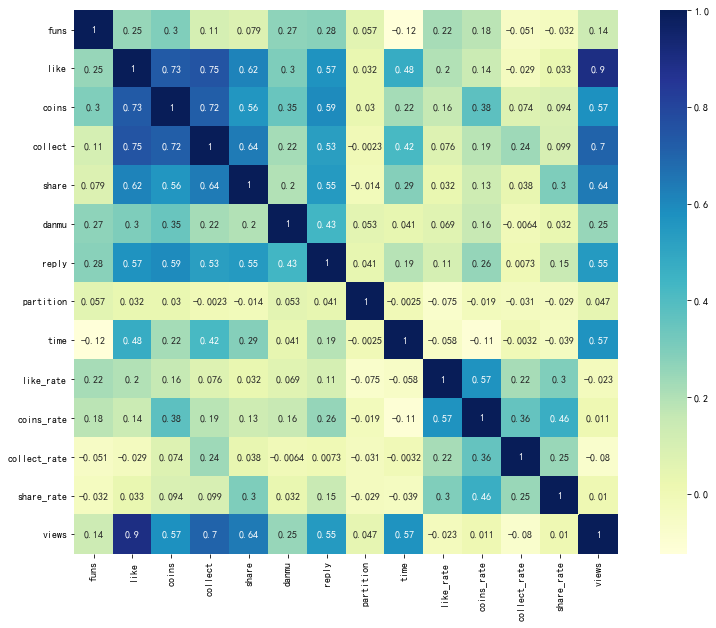

In [14]:
# 相关性矩阵
corr = df.corr()
sns.heatmap(corr,square=True,annot=True,cmap='YlGnBu')

corr

In [19]:
# 生成特征值与目标值
x = df.drop(['views'],axis=1)
y = df['views']

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
SelectKBest = SelectKBest(f_regression,k=6)
bestFeature = SelectKBest.fit_transform(x,y)
SelectKBest.get_support()
x.columns[SelectKBest.get_support()]

Index(['like', 'coins', 'collect', 'share', 'reply', 'time'], dtype='object')

In [28]:
df_best = df[['views','like', 'coins', 'collect', 'share', 'reply', 'time']]

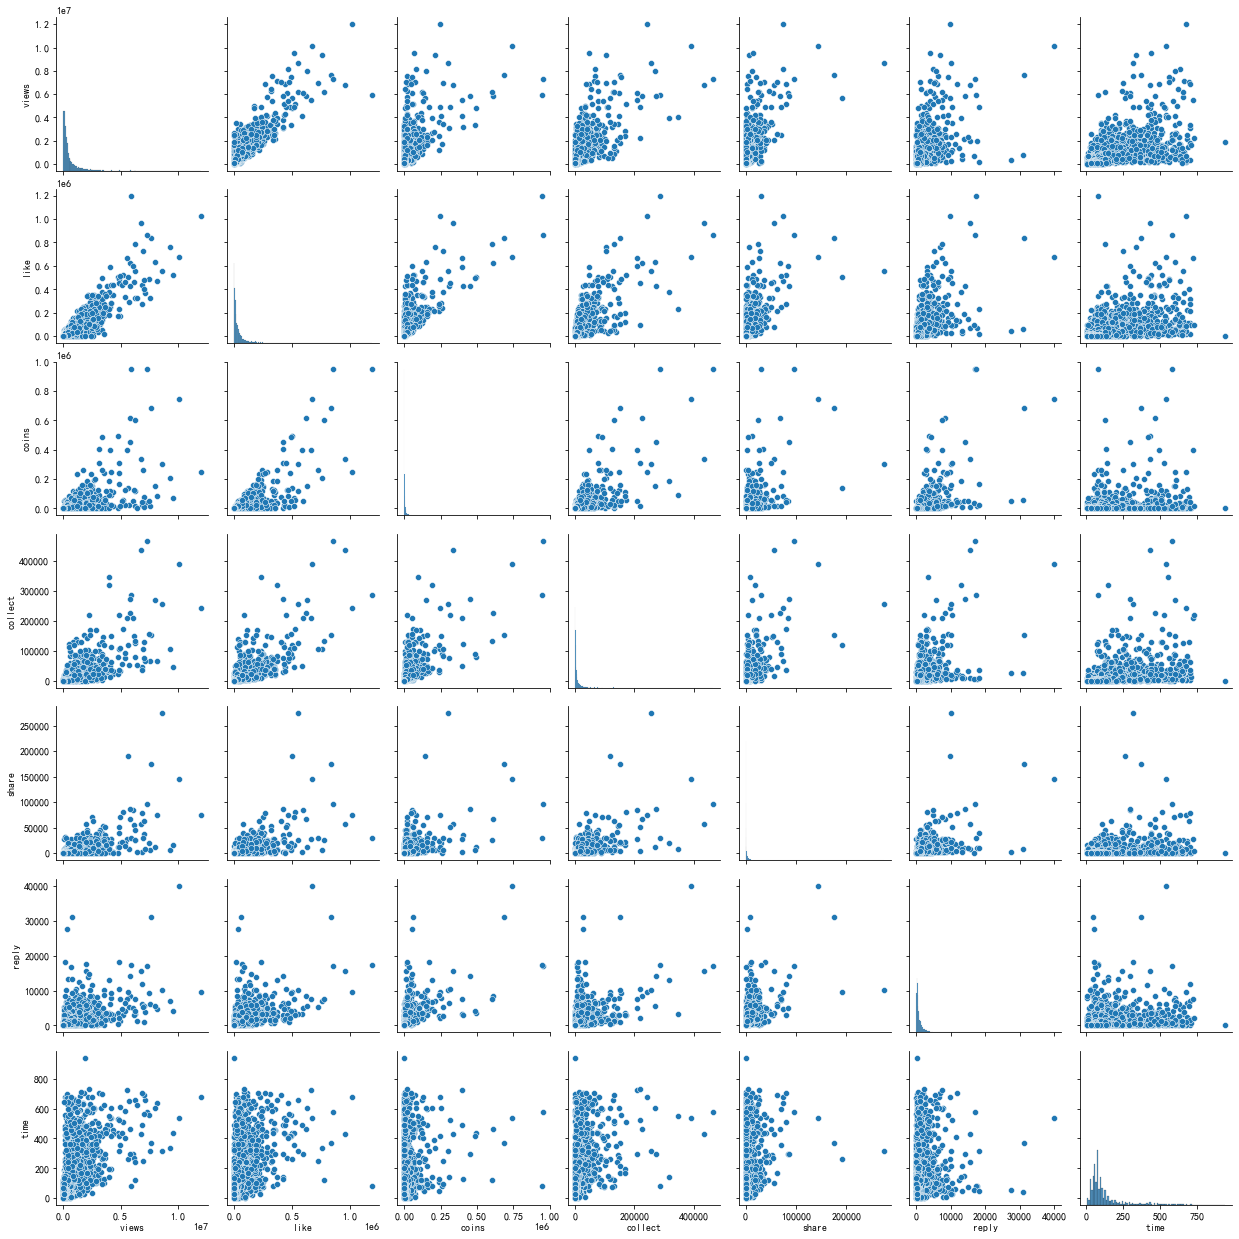

In [29]:
sns.pairplot(df_best)

In [30]:
df_best.corr()

,views,like,coins,collect,share,reply,time
views,1.000000,0.897961,0.574109,0.703087,0.641276,0.545210,0.570517
like,0.897961,1.000000,0.731776,0.753411,0.615094,0.570847,0.475118
coins,0.574109,0.731776,1.000000,0.718013,0.556531,0.594553,0.222776
collect,0.703087,0.753411,0.718013,1.000000,0.635677,0.528944,0.422614
share,0.641276,0.615094,0.556531,0.635677,1.000000,0.546253,0.287810
reply,0.545210,0.570847,0.594553,0.528944,0.546253,1.000000,0.188094
time,0.570517,0.475118,0.222776,0.422614,0.287810,0.188094,1.000000


array([[<AxesSubplot:title={'center':'views'}>,
        <AxesSubplot:title={'center':'like'}>,
        <AxesSubplot:title={'center':'coins'}>],
       [<AxesSubplot:title={'center':'collect'}>,
        <AxesSubplot:title={'center':'share'}>,
        <AxesSubplot:title={'center':'reply'}>],
       [<AxesSubplot:title={'center':'time'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

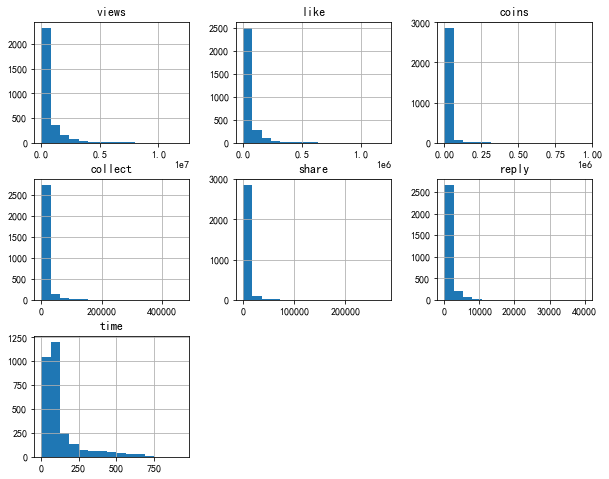

In [33]:
df_best.hist(bins=15)

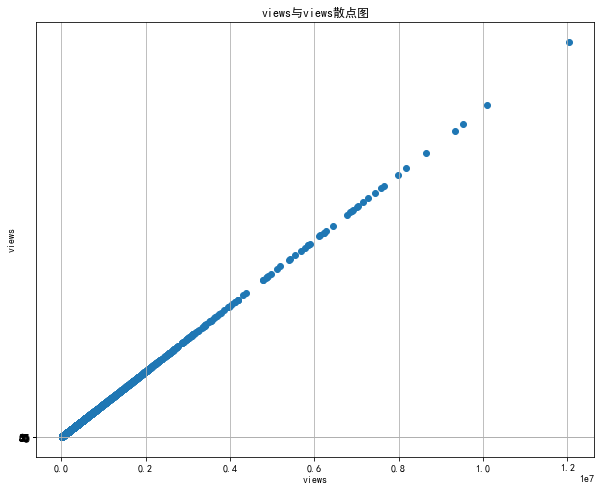

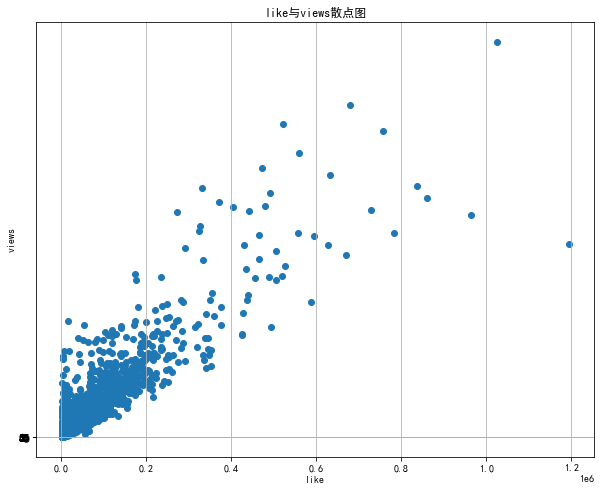

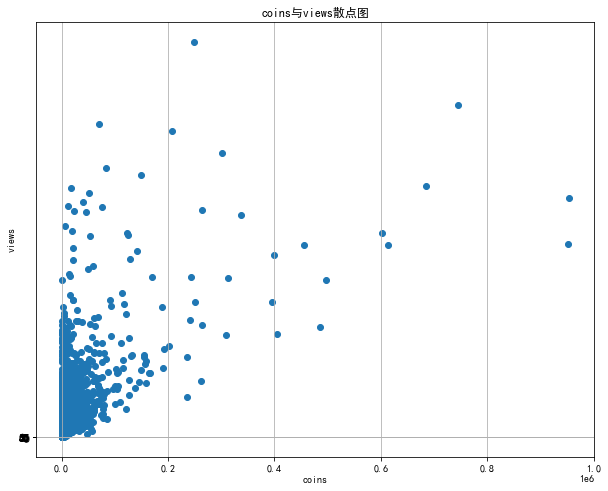

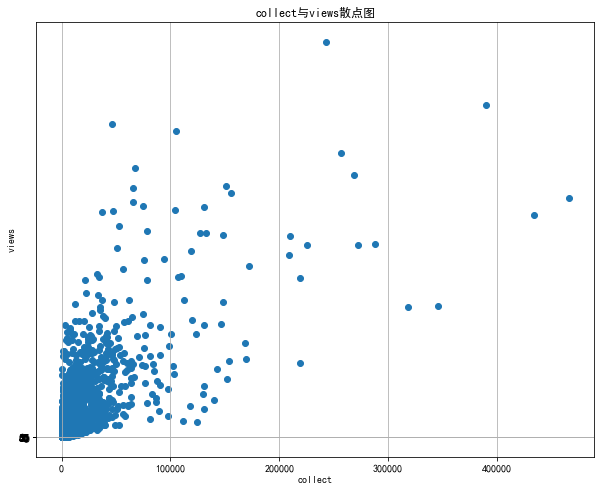

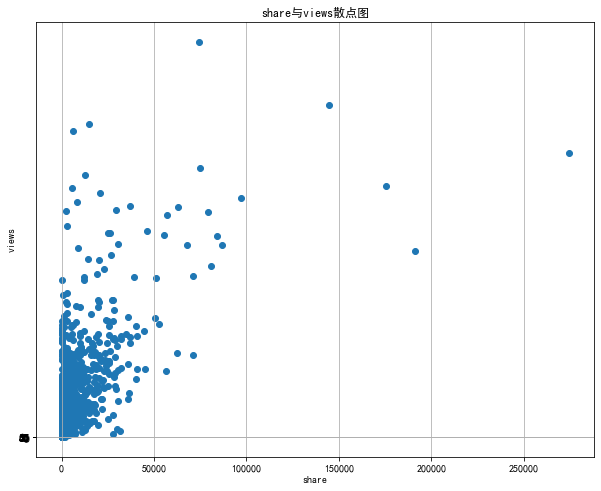

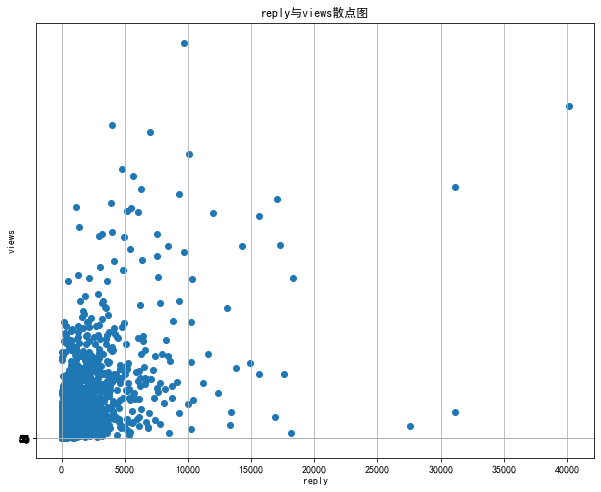

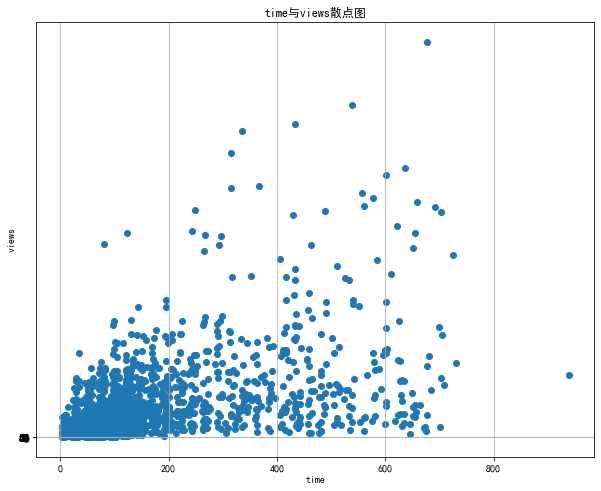

In [32]:
plt.style.use({'figure.figsize':(10,8)})
for each in df_best.columns:
    plt.scatter(df_best[each], df['views'])
    plt.title('{}与views散点图'.format(each))
    plt.xlabel(each)
    plt.ylabel('views')
    plt.yticks (range(0,60,5))
    plt.grid()
    plt.show ()